## Algoritmo KNN el vecino más cercano


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### leemos el archivo cvs que contiene los datos de los vinos rojos

In [5]:
dataframe = pd.read_csv(r"winequality-red.csv",sep=';')
dataframe.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:

dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


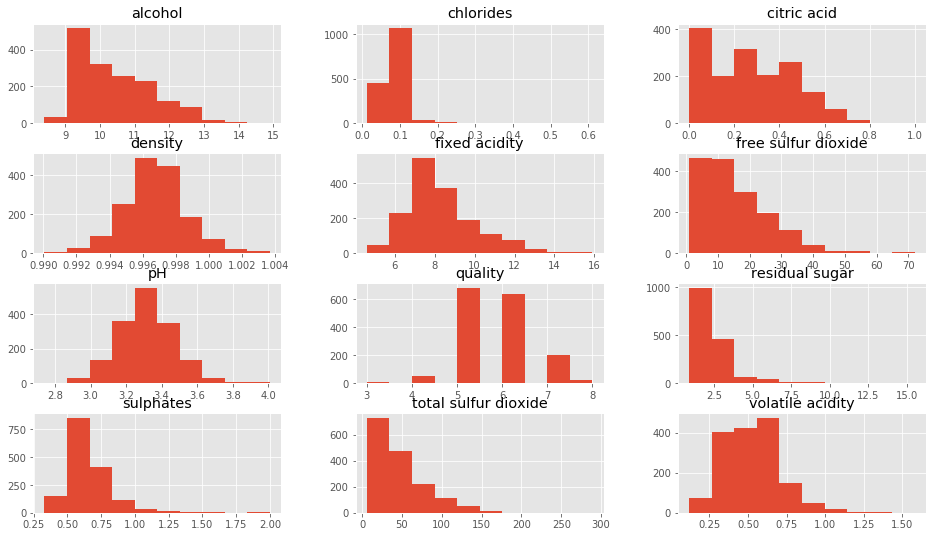

In [7]:
dataframe.hist()
plt.show()

In [8]:
print(dataframe.groupby('alcohol').size())

alcohol
8.400000      2
8.500000      1
8.700000      2
8.800000      2
9.000000     30
             ..
13.500000     1
13.566667     1
13.600000     4
14.000000     7
14.900000     1
Length: 65, dtype: int64


### Se visualiza de manera estadística el nivel de calidad entre los vinos, dando una escala desde 0 a 8 (quality) la calidad y la cantidad de vinos (count) con el nivel de calidad

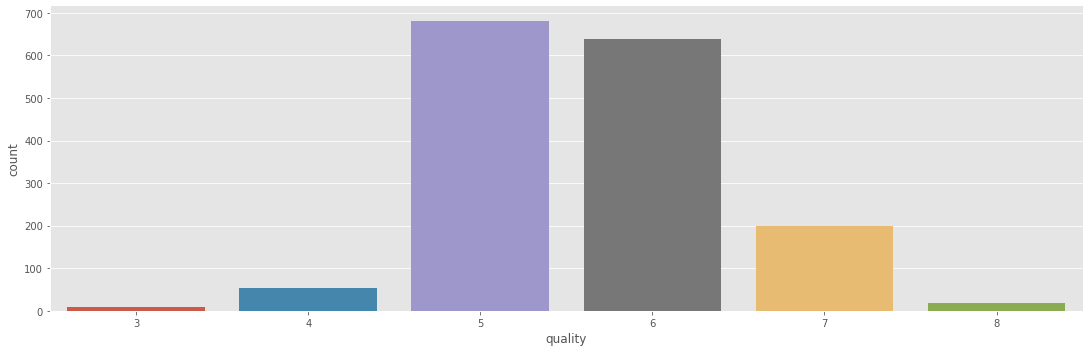

In [32]:
sb.factorplot('quality',data=dataframe,kind="count", aspect=3)

### Se visualiza de manera estadística el nivel de la ausencia de dióxido de sulfato entre los vinos dando el nivel del sulfato en el eje x ( free sulfur dioxide), y la cantidad de vinos (count) en el eje y

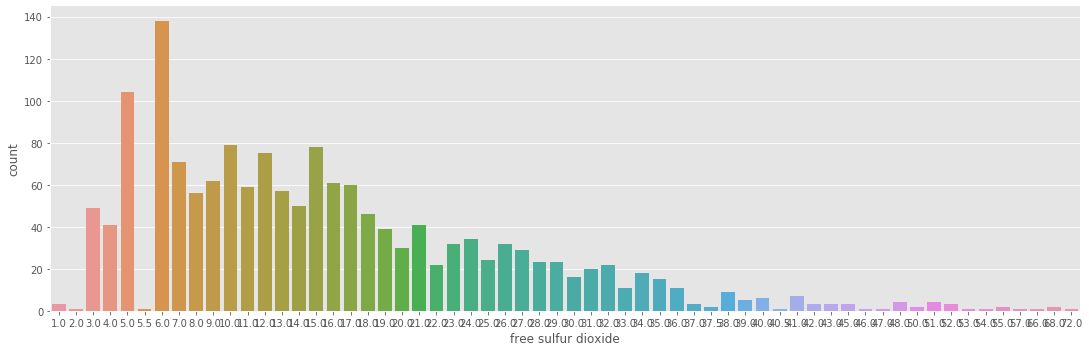

In [10]:

sb.factorplot('free sulfur dioxide',data=dataframe,kind="count", aspect=3)

### Creamos el data set con el cual trabajaremos para el entrenaiento de algoritmo

In [11]:
X = dataframe[['alcohol','free sulfur dioxide']].values
y = dataframe['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
n_neighbors = 10

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión del clasificador K-NN en el conjunto de prueba: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión del clasificador K-NN en el conjunto de entrenamiento: 0.61
Precisión del clasificador K-NN en el conjunto de prueba: 0.57


### Generamos la gráfica de todo el vecindario de los datos

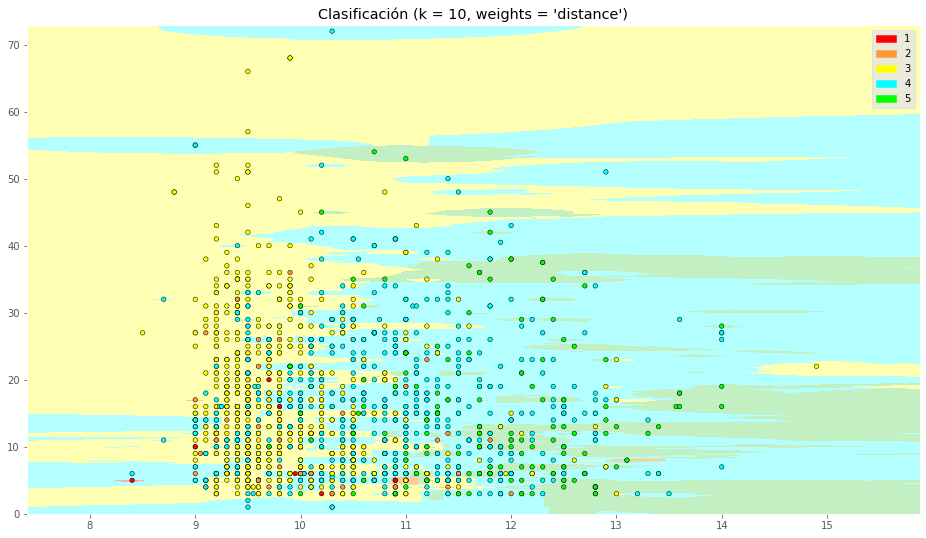

In [14]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("Clasificación (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

In [15]:

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0   0   1   1   0   0]
 [  0   0  11   3   0   0]
 [  0   3 121  42   3   0]
 [  0   0  60  94  16   0]
 [  0   1   4  21  14   0]
 [  0   0   0   2   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.61      0.72      0.66       169
           6       0.58      0.55      0.56       170
           7       0.39      0.35      0.37        40
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.26      0.27      0.27       400
weighted avg       0.54      0.57      0.56       400



D:\Users\leand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
k_range = range(1, 1500)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Exactitud')
plt.scatter(k_range, scores)
plt.xticks([0,300,600,900,1500])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1199, n_neighbors = 1200

### Datos ingresados de un nuevo vino para las predicciones

In [19]:
print(clf.predict([[936, 180]]))

[6]


In [82]:
print(clf.predict_proba([[20, 3.5]]))


[[0.         0.         0.14112085 0.71855383 0.         0.14032532]]
